In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
try:
    df = pd.read_csv('feature_selected_dataset.csv')
    print("Feature-selected dataset loaded.")
except FileNotFoundError:
    print("Error: 'feature_selected_dataset.csv' not found.")
    exit()

X = df.drop('target', axis=1)
y_true = df['target'] 

Feature-selected dataset loaded.



--- Applying K-Means Clustering ---


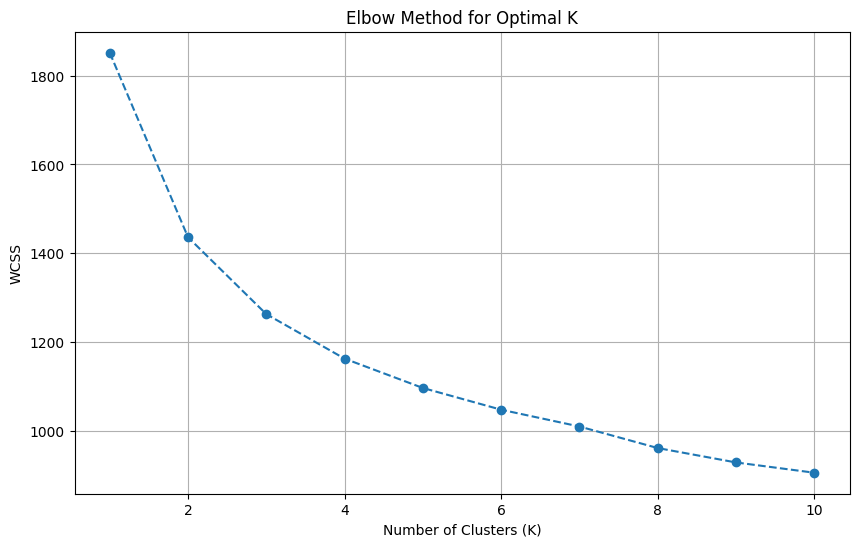

In [14]:
print("\n--- Applying K-Means Clustering ---")
wcss = [] 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)


--- Performing Hierarchical Clustering ---


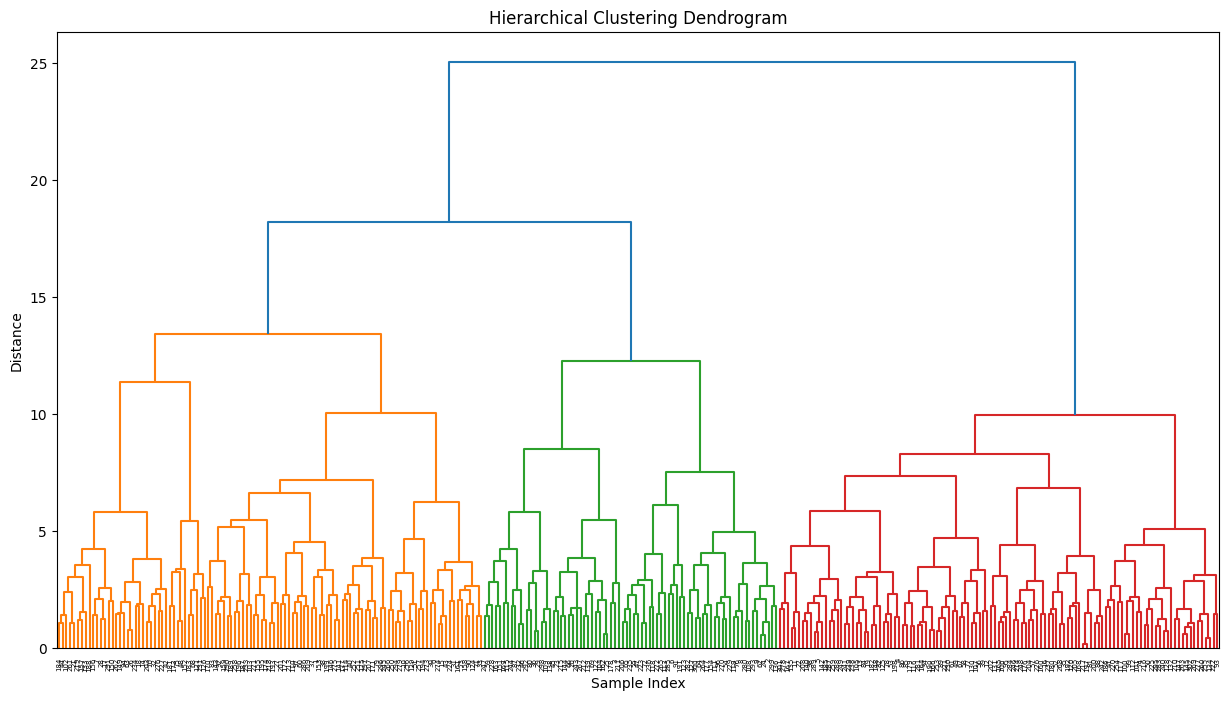

In [15]:
print("\n--- Performing Hierarchical Clustering ---")
linked = linkage(X, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [16]:
print("\n--- Comparing Clusters with Actual Labels ---")
df['kmeans_cluster'] = y_kmeans
df['hc_cluster'] = y_hc

kmeans_crosstab = pd.crosstab(df['target'], df['kmeans_cluster'])
print("\nK-Means Clustering Crosstab:")
print(kmeans_crosstab)

hc_crosstab = pd.crosstab(df['target'], df['hc_cluster'])
print("\nHierarchical Clustering Crosstab:")
print(hc_crosstab)


--- Comparing Clusters with Actual Labels ---

K-Means Clustering Crosstab:
kmeans_cluster    0   1
target                 
0               124  40
1                40  99

Hierarchical Clustering Crosstab:
hc_cluster    0   1
target             
0            74  90
1           114  25
